In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SEED = 150 
np.random.seed(SEED)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.datasets import make_blobs

### Create data point frame

#### Function Building

In [33]:
def create_sample(num_classes = 10,
                  samples_per_class = 300,num_outliers = 10,low_outlier =-5, high_outlier = 5,
                  seed = 42)->list[pd.DataFrame,pd.DataFrame]:
    

    X, y = make_blobs(n_samples = num_classes * samples_per_class, 
                    centers = num_classes, 
                    cluster_std = 1.2, 
                    random_state = seed)
       
    outliers_X = np.random.uniform(low = low_outlier, high = high_outlier, size=(num_outliers, X.shape[1]))
    outliers_y = np.random.randint(0, num_classes, size=num_outliers) 
    
    X = np.vstack([X, outliers_X])
    y = np.hstack([y, outliers_y])
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    df = pd.DataFrame(x_train, columns=['x', 'y'])
    df['class'] = y_train

    df_test = pd.DataFrame(x_test, columns=['x', 'y'])
    df_test['class'] = y_test
    return df, df_test

df, df_test = create_sample(num_classes = 10,samples_per_class = 300, num_outliers = 20)

In [34]:
df.loc[0]

x       -3.646709
y       -2.442123
class    9.000000
Name: 0, dtype: float64

### Visualize data frame

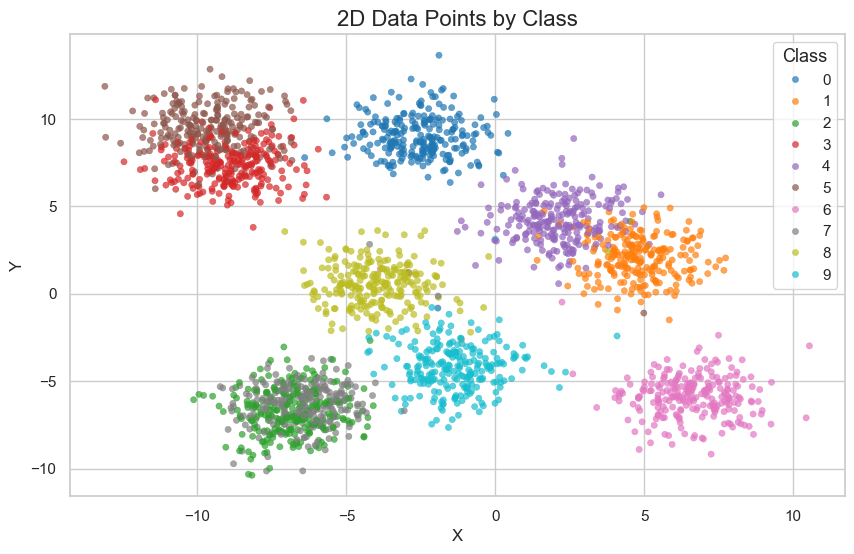

In [35]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=20, alpha=0.7, edgecolor=None)

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

### Randomly Create Sample for clustering

#### Sample test

In [36]:
np.random.seed(10)
outlier_x = np.random.uniform(low=df['x'].min() , high=df['x'].max())
outlier_y = np.random.uniform(low=df['y'].min() , high=df['y'].max() )
outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

print(outlier_df.to_numpy()[0][0], outlier_df.to_numpy()[0][1])

5.133620978144526 -9.887199991058376


#### Function Building 

In [37]:
def create_outlier(min_x, max_x, min_y, max_y, seed =None)->tuple[float, float]:
    np.random.seed(seed)
    
    outlier_x = np.random.uniform(low=0 - 10 , high=0 + 10)
    outlier_y = np.random.uniform(low=0 - 10, high=0 + 10)
    outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

    return (outlier_df.to_numpy()[0][0],outlier_df.to_numpy()[0][1])

### Visualize randomly point

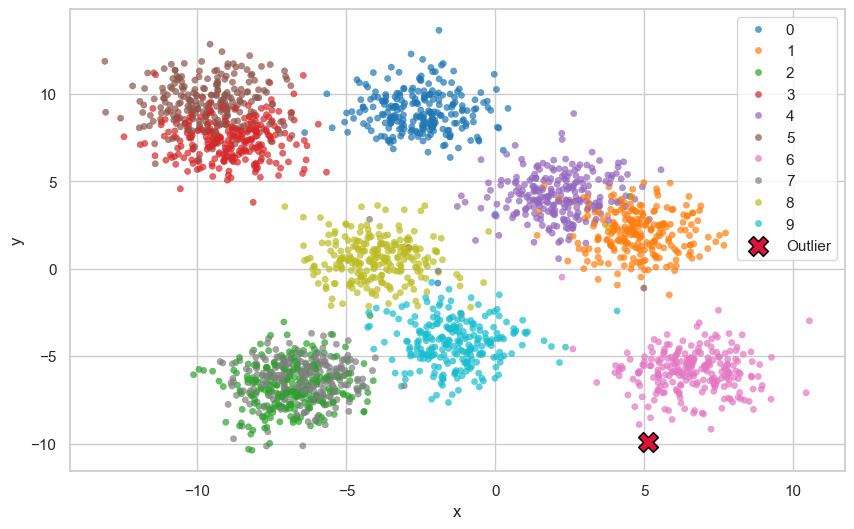

In [38]:
df_combined = pd.concat([df, outlier_df], ignore_index=True)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=20, alpha=0.7, edgecolor=None)
sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                marker='X', label='Outlier', edgecolor='black')

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

### Calcualte Distance (Euclien Distance)

In [39]:
x_point = df.to_numpy()[:, 0]
y_point = df.to_numpy()[:, 1]
class_point = df.to_numpy()[:, 2].astype(np.uint8)
class_point[0:20]

array([9, 3, 3, 8, 9, 3, 0, 2, 6, 4, 9, 9, 2, 0, 3, 3, 1, 0, 9, 2],
      dtype=uint8)

In [40]:
p_sample_x = outlier_df.loc[0,'x']
p_sample_y = outlier_df.loc[0,'y']
print(f'point_x: {p_sample_x} | point_y: {p_sample_y}')

point_x: 5.133620978144526 | point_y: -9.887199991058376


##### Find out distances and sorting

In [41]:
distance_matrix = np.sqrt((x_point - p_sample_x)**2 + (y_point - p_sample_y)**2)
distance_matrix_sorted = np.sort(distance_matrix)
distance_matrix_sorted[0:10]

array([1.02433812, 1.35671724, 1.49665223, 1.89894613, 1.92616145,
       1.98225565, 2.04065748, 2.2239593 , 2.23152147, 2.2315922 ])

In [42]:
k_indicate = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:100]]
print(f'indicate: {k_indicate}')
print(f'Class belong to: {class_point[k_indicate]}')

set_indice = set(class_point[k_indicate])
print(f'set indicate: {set_indice}')
repeat = [list(class_point[k_indicate]).count(x) for x in set_indice]
print(f'repeat: {repeat}')
indice_max = np.array(repeat).argmax()
print(f'max indicator: {indice_max}')
print(f'class belong to: {(list(set_indice))[indice_max]}')

indicate: [2349, 1076, 471, 209, 366, 122, 1254, 2235, 1755, 524, 685, 1045, 604, 2108, 379, 1219, 1622, 1854, 1086, 80, 2225, 52, 1314, 525, 625, 2316, 537, 1389, 1256, 1216, 1185, 1240, 686, 1235, 1024, 590, 8, 652, 1947, 2312, 2004, 745, 648, 1917, 131, 2060, 1151, 544, 1441, 1268, 65, 1087, 1640, 2243, 1793, 120, 416, 1556, 1987, 971, 688, 1861, 1449, 21, 1395, 896, 205, 1651, 1041, 2339, 1612, 2170, 2219, 1307, 804, 2075, 2403, 2024, 2380, 1042, 2209, 374, 1801, 894, 548, 1089, 1693, 1451, 210, 1528, 110, 1393, 847, 426, 1124, 2117, 1128, 1223, 916, 193]
Class belong to: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
set indicate: {6}
repeat: [100]
max indicator: 0
class belong to: 6


### Build up knn classifier 

In [43]:
class knn_classifier:
    """
    * Input: 
        * data_point(data_point:pd.DataFram) column 0: 'x', column 1: 'y', column3: 'class'
        data_point(np.array) column 0: 'x', column 1: 'y', column3: 'class'
        * random point(tuple): (x, y)
        * distance
    * Return class with highest probability
    
    """
    def __init__(self,  df:pd.DataFrame,   distance = "euclidean" , k  = 5):
        
        self.k = k 
        self.df = df

        self.x_point = df.to_numpy()[:, 0]
        self.y_point = df.to_numpy()[:, 1]
        self.class_point = df.to_numpy()[:, 2].astype(np.uint8)
        self.distance = distance
        
    def __visualize (self,point_sample):

        outlier_df = pd.DataFrame({'x': [point_sample[0]], 'y': [point_sample[1]], 'class': ['outlier']})

        df_combined = pd.concat([self.df, outlier_df], ignore_index=True)
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=20, alpha=0.7, edgecolor=None)
        plot = sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                        marker='X', label='Outlier', edgecolor='black')

        plot.set_title('2D Data Points by Class', fontsize=16)
        plot.set_xlabel('X', fontsize=12)
        plot.set_ylabel('Y', fontsize=12)
        plot.legend(title='Class', title_fontsize='13', fontsize='11')

        plt.savefig('knn.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def __euclieanDis(self,x:np.array, y:np.array,
                            x_sample:float, y_sample:float) -> np.array:
        return np.sqrt((x-x_sample)**2 + (y-y_sample)**2)

    def __manhattanDis(self,x:np.array, y:np.array,
                            x_sample:float, y_sample:float) -> np.array:

        return np.abs((x - x_sample) + (y-y_sample)) 
    
    def predict(self,point_sample, visualize = False):
        """
        Return: Predict the class the point belongs to
        ________________________________________________________________________________________________
        * Args: randomly sample (tuple data type): x_sample = point_sample[0], y_sample = point_sample[1]

        * Example:
            >>> np.random.seed(42)
            >>> df = create_data_point()
            >>> p_sample_x, p_sample_ = create_sample(df)
            >>> p_sample_x, p_sample_y = (11.659134346998647, 9.862241861392949)
            >>> knn =  knn_classifier(df, (p_sample_x, p_sample_y), "euclidean", _k=5)
            >>> knn.predict((p_sample_x, p_sample_y ), visualize = True)
            >>> 4
        """
        if visualize:
            self.__visualize(point_sample)

        if self.distance == "euclidean":
            distance_matrix = self.__euclieanDis(self.x_point, self.y_point,
                                                    point_sample[0],point_sample[1])
        elif self.distance == "manhattan":
            distance_matrix = self.__manhattanDis(self.x_point, self.y_point,
                                                    point_sample[0],point_sample[1])
            
        distance_matrix_sorted = np.sort(distance_matrix)

        k_indice = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:self.k]]
        set_indice = set(class_point[k_indice])

        repeat = [list(class_point[k_indice]).count(x) for x in set_indice]
        indice_max = np.array(repeat).argmax()
        
        return (list(set_indice))[indice_max] 

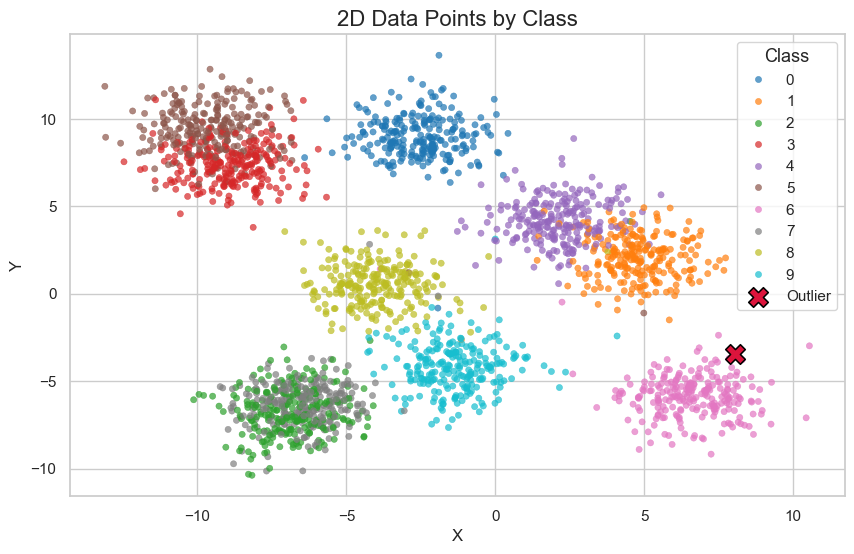

Class Prediction: 6


In [44]:
knn =  knn_classifier(df, "euclidean", k= 90)
predict_class = knn.predict(create_outlier(min_x=df['x'].min(),
                                           max_x=df['x'].max(),
                                           min_y=df['y'].min(),
                                           max_y=df['y'].max(),seed=None),visualize=True)
print(f'Class Prediction: {predict_class}')

### Select K by metrics (Accuracy, Precion, F1-Score, Recall-Score)

In [45]:
y_true = df_test.to_numpy().astype(np.int8)[:,2]
print(y_true[0])
print((df_test.loc[0,'x'],df_test.loc[0,'y']))

1
(4.105275810547175, 3.717231056481973)


In [46]:
k_value = [x for x in range(0,30) if x%2==1] 
for _k in k_value:
    knn =  knn_classifier(df, "euclidean", k = _k)
    y_true = df_test.to_numpy().astype(np.int8)[:,2]
    y_pred = []
    for i in range(df_test.to_numpy()[:,2].shape[0]):
        point_sample = (df_test.loc[i,'x'],df_test.loc[i,'y'])

        predict_class = knn.predict(point_sample,visualize=False)
        y_pred.append(int(predict_class))

    y_pred = np.array(y_pred)  
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"k = {_k:5} - Accuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f}")

k =     1 - Accuracy: 0.83 | Precision: 0.83 | Recall: 0.83 | F1 Score: 0.83

k =     3 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =     5 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =     7 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =     9 - Accuracy: 0.83 | Precision: 0.83 | Recall: 0.83 | F1 Score: 0.83

k =    11 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =    13 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =    15 - Accuracy: 0.85 | Precision: 0.85 | Recall: 0.85 | F1 Score: 0.85

k =    17 - Accuracy: 0.85 | Precision: 0.85 | Recall: 0.85 | F1 Score: 0.85

k =    19 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =    21 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1 Score: 0.84

k =    23 - Accuracy: 0.85 | Precision: 0.85 | Recall: 0.85 | F1 Score: 0.85

k =    25 - Accuracy: 0.84 | Precision: 0.84 | Recall: 0.84 | F1